In [1]:
import asyncio
import websockets
import json
import pandas as pd
import nest_asyncio
import matplotlib.pyplot as plt
nest_asyncio.apply()
import warnings
import numpy as np
import datetime
from utils import collect_all_instruments_ids, collect_single_instrument_data
warnings.filterwarnings("ignore")

## Соберем все id-щники и опционы, которым они соответсвуют

In [2]:
# все id-шники
instruments_df = collect_all_instruments_ids()
instruments_df.head(5)

,instrument_name,instrument_id
0,BTC-12DEC22-14000-C,143923
1,BTC-12DEC22-14000-P,143924
2,BTC-12DEC22-15000-C,143925
3,BTC-12DEC22-15000-P,143926
4,BTC-12DEC22-15500-C,143927


## Собираем данные по конкретному опциону

In [3]:
# по конкретному опциону
single_option = collect_single_instrument_data(instrument_id = int(instruments_df.sample(1).iloc[0].instrument_id), number_of_ticks = 100)
single_option.head(5)

2022-12-11 11:44:25.162 | INFO     | utils:call_api:68 - Collected 100 ticks for id = 143275


,instrument_name,timestamp,underlying_price,mark_iv,mark_price,best_bid_price,best_ask_price,human_timestamp,strike
0,BTC-23DEC22-18000-P,1670748258174,17141.60,87.02,0.0925,0.0,0.0,2022-12-11 11:44:18.174000,18000
26,BTC-23DEC22-18000-P,1670748260188,17141.59,87.02,0.0925,0.0,0.0,2022-12-11 11:44:20.188000,18000
41,BTC-23DEC22-18000-P,1670748261195,17141.18,87.02,0.0925,0.0,0.0,2022-12-11 11:44:21.195000,18000
56,BTC-23DEC22-18000-P,1670748262202,17141.15,87.02,0.0925,0.0,0.0,2022-12-11 11:44:22.202000,18000
71,BTC-23DEC22-18000-P,1670748263209,17141.44,87.02,0.0925,0.0,0.0,2022-12-11 11:44:23.209000,18000


## Собираем по одному тику для каждого опциона с одинаковым временем экспирации, чтобы узнать все страйки и их рыночные волатильности

2022-12-11 11:44:46.975 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 130486
2022-12-11 11:44:47.344 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 130487
2022-12-11 11:44:47.708 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 141838
2022-12-11 11:44:48.071 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 141839
2022-12-11 11:44:48.436 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 130251
2022-12-11 11:44:48.810 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 130252
2022-12-11 11:44:49.174 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 131275
2022-12-11 11:44:49.543 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 131276
2022-12-11 11:44:49.903 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 143887
2022-12-11 11:44:50.268 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 143888
2022-12-11 11:44:50.633 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 143889

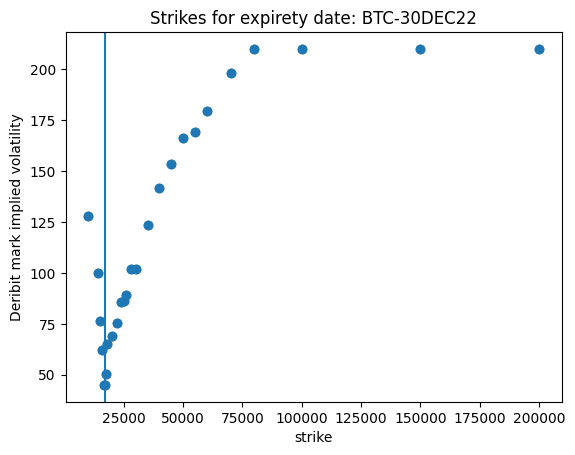

In [5]:
random_instrument = instruments_df.sample(1).iloc[0]["instrument_name"]
single_strike = instruments_df[
    (instruments_df["instrument_name"].str.startswith(random_instrument[0:11])) 
]
single_strike_ids = single_strike.instrument_id.to_list()

options = pd.DataFrame(columns = single_option.columns.values)
for op_id in single_strike_ids:
    try:
        option = collect_single_instrument_data(instrument_id = op_id, number_of_ticks = 1)
        options = options.append(option)
    except:
        continue
    
plt.scatter(options["strike"], options["mark_iv"])
plt.axvline(x=option.iloc[0]["underlying_price"])
plt.xlabel("strike")
plt.ylabel("Deribit mark implied volatility")
exp_date = options.iloc[0].instrument_name[:11]
plt.title(f"Strikes for expirety date: {exp_date}")
plt.show()

options.to_pickle(f"data/{exp_date}.pkl")